# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [238]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [239]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [240]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [241]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [242]:
my_tab = pd.crosstab(index=data["Label"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
Label,
0,137924
1,797


* Existe un desbalanceo muy pronunciado en la base de datos que se esta utilizando. Para las transacciones fraudulentas se tiene un 0.57% de la muestra. 

In [243]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [244]:
# Create Train a Test data frame

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [245]:
X_train

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0
12062,1,1,0,0.00,0.00,5.064533,5.096396,4.369448,4.505025,0.000000,4.423575,149.79,149.790000,0.451985,4.524580
58027,1,1,0,0.00,0.00,0.510826,0.538996,3.935740,4.096793,0.000000,4.823671,113.97,113.970000,3.314976,4.461622
61010,2000,0,1,98.54,98.54,0.925769,1.232144,4.576642,4.634443,368.820833,4.874212,98.54,98.540000,4.041455,4.836982
19567,1,1,0,0.00,0.00,0.451985,0.510826,3.471156,3.468337,0.000000,3.588338,169.00,176.664150,3.587136,4.921318
122268,1,1,150,769.00,0.00,5.412885,1.477266,5.563677,3.429579,0.340972,2.628801,4.99,4.990000,2.625359,3.954522
23188,1,0,1,1411.04,1411.04,5.064533,5.096396,4.828686,4.833898,0.009722,4.871762,1411.04,1411.040000,0.739667,4.962055
67420,1,1,0,0.00,0.00,5.064533,5.096396,4.300859,4.427993,0.002083,4.871762,149.79,149.790000,2.423538,4.921318
129556,36,1,0,0.00,0.00,5.064533,5.096396,4.911509,4.992339,0.001389,4.871556,139.99,139.990000,1.799307,4.962055
26002,1756,1,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,414.253472,3.314186,149.79,149.790000,2.746688,4.965339
131767,1,1,0,0.00,0.00,5.412885,0.538996,5.563677,4.096793,0.000694,4.266760,109.99,109.990000,1.466337,4.748314


In [246]:
y_train

12062     0
58027     0
61010     0
19567     0
122268    0
23188     0
67420     0
129556    0
26002     0
131767    0
3571      0
106320    0
85333     0
108342    0
66045     0
93235     0
54868     0
98029     0
19985     0
579       0
91189     0
37809     0
68969     0
67017     0
115105    0
66267     0
96594     0
18656     0
81450     0
130347    0
         ..
82462     0
127609    0
131503    0
58072     0
95496     0
61756     0
128896    0
107833    0
3606      0
117565    0
37183     0
99335     0
120809    0
104589    0
33878     0
26103     0
31959     0
92740     0
103068    0
19946     0
51668     0
21758     0
31228     0
21440     0
117583    0
73349     0
109259    0
50057     0
5192      0
128037    0
Name: Label, Length: 104040, dtype: int64

In [8]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
# Accuracy calculation

y_pred = logreg.predict(X_test)

acc = float((y_pred == y_test).mean())

acc

0.9939736455119518

* Al desarollar el modelo logistico se genera un modelo que solo predice los casos que no tienen fraude, por lo que el modelo teoricamente tiene un Accuracy bastante alto, pero realmente el modelo no esta generando el valor que se espera ya que no esta prediciendo las transacciones fraudulentas.

0.994503415091 0.993926724216 0.994155598407 0.000191411004067


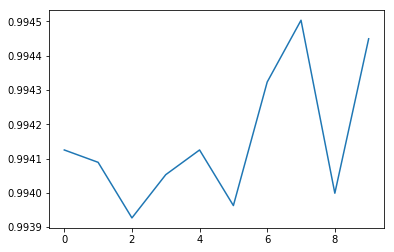

In [10]:
# Se desarrollara el calculo del Acurracy con diferentes parametros i: Random State,
# para identificar las variaciones del acurracy dependiendo de la partición de Train y Test

accuracy = []
for i in range(10):

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=i)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = float((y_pred == y_test).mean())
    accuracy.append(acc)

plt.plot(list(range(10)), accuracy)

accuracy = np.array(accuracy)
print(accuracy.max(), accuracy.min(), accuracy.mean(), accuracy.std())

In [11]:
#F1_Score

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)
print(cm)

[[55180     1]
 [  308     0]]


In [12]:
my_tab2 = pd.crosstab(y_pred_class,  # Make a crosstab
                              columns="count")      # Name the count column

my_tab2

col_0,count
row_0,
0,55488
1,1


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))

precision_score  0.0
recall_score     0.0


In [14]:
print('f1_score    ', f1_score(y_test, y_pred_class))

f1_score     0.0


Para este caso la muestra positiva es la transacción fraudulenta (es decir Label=1)

* **Precision Score:** En este caso el indicador es igual a 0 debido a que el clasificador no tuvo la capacidad de clasificar ninguna transaccion fraudulenta (TP).  

* **Recall Score:** En este caso el indicador es igual a 0 debido a que el clasificador no tuvo la capacidad de clasificar ninguna transaccion fraudulenta(TP). Con esto se peude concluir que el modelo no tiene capacidad de identificar las muestras positivas (Fraudulentas)

* Finalmente el **F1 Score** sera igual a cero ya que sus dos componentes de calculo son equivalentes a cero.

Se puede concluir que el modelo no clasifica de manera adecuada las transacciones fraudulentas por lo que es un modelo que no tiene aplicabilidad. Este efecto se genera seguraente por el des balanace de las muestra. Para poder calibrar un modelo se deberan aplicar **resampling** para balancear la muestra.
 

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**


In [168]:
# Determinar tamaño de muestra de y_train
n_samples = y_train.shape[0]
print(n_samples)

104040


In [169]:
# Determinar tamaño muestra observaciones negativas (0)

n_samples_0 = (y_train == 0).sum()
n_samples_0

103452

In [170]:
# Determinar tamaño muestra observaciones positivas (1)

n_samples_1 = (y_train == 1).sum()
n_samples_1

588

In [171]:
# Porcion de observaciones positivas en la muestra
n_samples_1 / n_samples

0.0056516724336793545

In [172]:
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new

588.0

**Se aplicara la siguiente formula para generar una bace balanceada 50 - 50**

0.5 = n_samples_1 / (n_samples_1 + n_samples_0_new)

In [173]:
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.0056837953833661992

In [174]:
# Select all negatives
filter_ = y_train == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [175]:
filter_.sum()

549

In [176]:
filter_ = filter_ | (y_train == 1)

In [177]:
filter_ = filter_.astype(bool)

In [178]:
filter_.sum()

1137

In [179]:
y_train_under = y_train[filter_]
X_train_under = X_train[filter_]

In [180]:
y_train_under.shape

(1137,)

In [181]:
X_train_under.shape

(1137, 15)

In [182]:
my_tab = pd.crosstab(index=y_train_under,  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
Label,
0,549
1,588


In [183]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train_under, y_train_under)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [184]:
# Accuracy calculation

y_pred = logreg.predict(X_test)

acc = float((y_pred == y_test).mean())

acc

0.49537210576396296

In [185]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred))
print('recall_score    ', recall_score(y_test, y_pred))
print('f1_score    ', f1_score(y_test, y_pred))

precision_score  0.00936329588015
recall_score     0.789473684211
f1_score     0.0185070943862


# Otro metodo para realizar Under Sampling

Automatically created module for IPython interactive environment


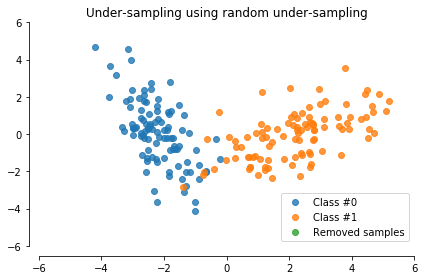

In [220]:
# Authors: Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
import numpy as np
import imblearn

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

print(__doc__)

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.5, 0.5],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()

# Exercice 04.3

Now using random-over-sampling

In [186]:
# Assuming minority class is the positive
n_samples = y_train.shape[0]
n_samples

104040

In [187]:
n_samples_0 = (y_train== 0).sum()
n_samples_1 = (y_train == 1).sum()
n_samples_0
n_samples_1

588

In [188]:
n_samples_1_new =  -0.5 * n_samples_0 / (0.5- 1)
n_samples_1_new

103452.0

In [189]:
filter_ = np.random.choice(X_train[y_train == 1].shape[0], int(n_samples_1_new))
filter_

array([156, 360, 431, ...,  91, 501, 351])

In [190]:
# filter_ is within the positives, change to be of all
filter_ = np.nonzero(y_train == 1)[0][filter_]
filter_

array([28255, 62761, 75284, ..., 17355, 85677, 62116])

In [191]:
filter_ = np.concatenate((filter_, np.nonzero(y_train == 0)[0]), axis=0)

In [208]:
y_train[filter_].shape

(206904,)

# Otro metodo para realizar Over - Sampling

Automatically created module for IPython interactive environment


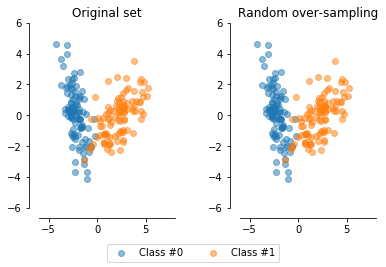

In [221]:
# Authors: Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler

print(__doc__)

# Generate the dataset
X_train, y_train = make_classification(n_classes=2, class_sep=2, weights=[0.5, 0.5],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X_train)

# Apply the random over-sampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y_train == 0, 0], X_vis[y_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y_train == 1, 0], X_vis[y_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

Automatically created module for IPython interactive environment


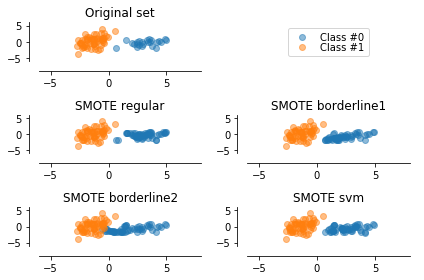

In [254]:
# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'nn': KNeighborsClassifier()}

In [58]:
# Train all the models
for model in models.keys():
    models[model].fit(X_train, y_train)

In [60]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [64]:
# Evaluate each model accuracy
    
for model in models.keys():
    print(model,float((y_pred[model] == y_test).mean()))


lr 0.9944493503216854
dt 0.9885923336156716
nb 0.7145199949539548
nn 0.9942150696534449


In [65]:
# Evaluate each model F1 Score

from sklearn.metrics import f1_score
    
for model in models.keys():
    print(model, f1_score(y_test, y_pred[model]))

lr 0.0
dt 0.119610570236
nb 0.018707799046
nn 0.125340599455


/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [149]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [150]:
rfreg.fit(X_train_under, y_train_under)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
scores_RF = cross_val_score(rfreg, X_train_under, y_train_under, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_RF))

0.45540932791381239

In [152]:
rfreg_100 = RandomForestRegressor(n_estimators=100)
rfreg_100

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [153]:
rfreg_100.fit(X_train_under, y_train_under)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [154]:
scores_RF100 = cross_val_score(rfreg_100, X_train_under, y_train_under, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_RF100))

0.43685188026997157